<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ayarları belirliyoruz
sns.set(style='whitegrid')
%matplotlib inline



In [5]:
# Wine veri setini yüklüyoruz
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Veri setinin ilk 5 satırını görüntülüyoruz
print(df.head())



   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [6]:
# Veriyi standardize ediyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# K-Ortalamalar modelini oluşturuyoruz
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Küme tahminlerini alıyoruz
y_kmeans = kmeans.predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2848589191898987
Contingency Matrix:
cluster   0   1   2
target             
0         0  59   0
1         3   3  65
2        48   0   0


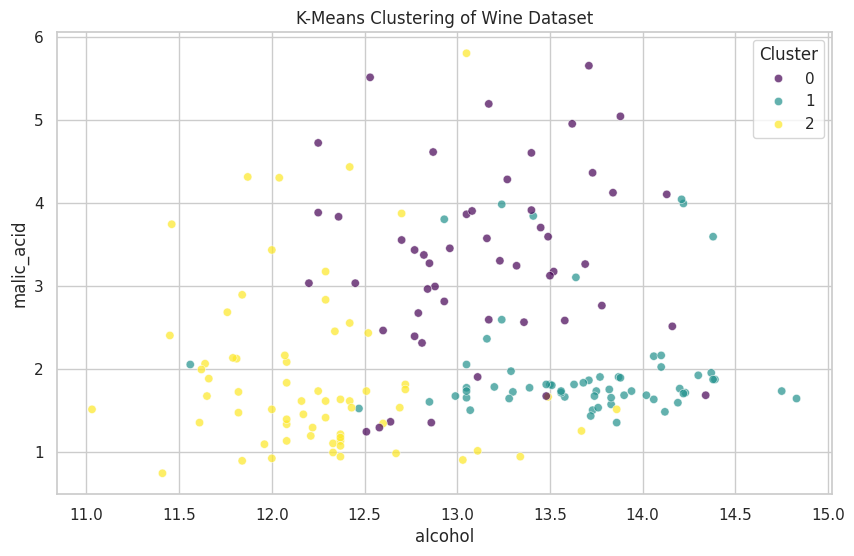

In [8]:
# Silhouette skorunu hesaplıyoruz
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

# Tahmin edilen kümeleri DataFrame'e ekliyoruz
df['cluster'] = y_kmeans

# Küme tahminlerini orijinal etiketlerle karşılaştırıyoruz
contingency_matrix = pd.crosstab(df['target'], df['cluster'])
print('Contingency Matrix:')
print(contingency_matrix)

# Kümeleri görselleştiriyoruz (ilk iki özellik kullanılarak)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[wine.feature_names[0]], y=df[wine.feature_names[1]], hue='cluster', data=df, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of Wine Dataset')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend(title='Cluster')
plt.show()


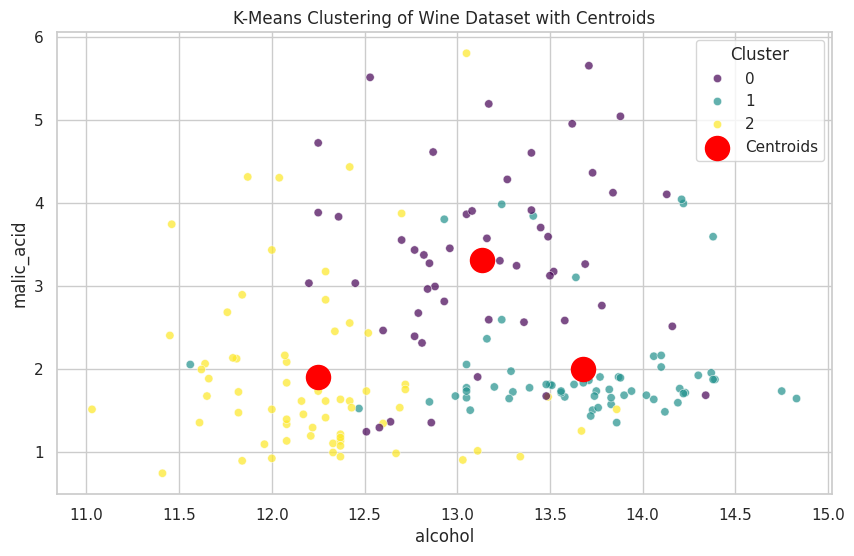

In [9]:
# Küme merkezlerini alıyoruz
centroids = kmeans.cluster_centers_

# Küme merkezlerini standardize edilmemiş veriye geri dönüştürüyoruz
centroids_unscaled = scaler.inverse_transform(centroids)

# Küme merkezlerini görselleştiriyoruz (ilk iki özellik kullanılarak)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[wine.feature_names[0]], y=df[wine.feature_names[1]], hue='cluster', data=df, palette='viridis', alpha=0.7)
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering of Wine Dataset with Centroids')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend(title='Cluster')
plt.show()
